<center><h2>Programming and Data Structures with Python Lab13.<br> Retrieving Data from Web Parsing</h2>

<h1>NAME: PAVITHIRAN. V<BR>ROLL NO:235229122</h1>

In [1]:
#q1
from bs4 import BeautifulSoup
from collections import Counter
import re
import urllib.request
url = 'https://www.google.com'
try:
    response = urllib.request.urlopen(url)
    html = response.read()
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text()
    words = re.findall(r'\w+', text.lower())  # Using regex to split text into words
    word_count = Counter(words)
    for word, frequency in word_count.items():
        print(f'{word}: {frequency}')

except Exception as e:
    print(f'Error: {e}')


googlesearch: 1
images: 1
maps: 1
play: 1
youtube: 1
news: 1
gmail: 1
drive: 1
more: 1
web: 1
history: 1
settings: 1
sign: 1
in: 3
advanced: 1
searchgoogle: 1
offered: 1
ह: 1
न: 1
द: 1
ব: 1
ল: 1
త: 1
ల: 1
గ: 1
मर: 1
ठ: 1
தம: 1
ழ: 1
ગ: 1
જર: 1
ત: 1
ಕನ: 1
ನಡ: 1
മലയ: 1
ള: 1
ਪ: 1
ਜ: 1
ਬ: 1
advertisingbusiness: 1
solutionsabout: 1
googlegoogle: 1
co: 1
2023: 1
privacy: 1
terms: 1


In [3]:
#q2
import urllib.request
from bs4 import BeautifulSoup

# Replace 'url_here' with the URL of the webpage you want to scrape
url = 'https://en.wikipedia.org/wiki/Main_Page'

try:
    # Send an HTTP GET request to the URL using urllib
    with urllib.request.urlopen(url) as response:
        # Check if the request was successful (HTTP status code 200)
        if response.code == 200:
            # Parse the HTML content of the page using BeautifulSoup
            soup = BeautifulSoup(response.read(), 'html.parser')

            # Find all anchor (a) tags with href attributes
            links = soup.find_all('a', href=True)

            # Display the href attributes of the hyperlinks
            count = 0
            for link in links:
                if count > 10:
                    break
                print(link['href'])
                count+=1
                    
        else:
            print('Failed to retrieve the web page. Status code:', response.code)
except urllib.error.URLError as e:
    print('Failed to retrieve the web page:', e)


#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random
/wiki/Wikipedia:About
//en.wikipedia.org/wiki/Wikipedia:Contact_us
https://donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_en.wikipedia.org&uselang=en
/wiki/Help:Contents
/wiki/Help:Introduction
/wiki/Wikipedia:Community_portal


In [3]:
from bs4 import BeautifulSoup

# Read the HTML file content
with open("student_marks.html", "r") as html_file:
    html_content = html_file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Extract the number of students
num_students = int(soup.find('p').text.split(': ')[1])

# Extract student information (IDs, Names, and Marks)
student_data = []
table_rows = soup.find_all('tr')[1:]  # Skip the header row

for row in table_rows:
    columns = row.find_all('td')
    student_id = columns[0].text
    student_name = columns[1].text
    mark1 = int(columns[2].text)
    mark2 = int(columns[3].text)
    mark3 = int(columns[4].text)
    student_data.append((student_id, student_name, mark1, mark2, mark3))

# Print the number of students
print("Number of Students:", num_students)

# Print student information
print("\nStudent Information:")
for student in student_data:
    student_id, student_name, mark1, mark2, mark3 = student
    print(f"ID: {student_id}, Name: {student_name}, Mark1: {mark1}, Mark2: {mark2}, Mark3: {mark3}")


Number of Students: 3

Student Information:
ID: 235229111, Name: rex, Mark1: 87, Mark2: 57, Mark3: 74
ID: 235229112, Name: peter, Mark1: 68, Mark2: 98, Mark3: 55
ID: 235229113, Name: anna, Mark1: 85, Mark2: 67, Mark3: 92


In [2]:
import json

# Define the student data as a list of dictionaries
students_data = [
    {
        "ID": "ds01",
        "Name": "Kumar",
        "Semester": {
            "semester1": [91, 93]
        }
    },
    {
        "ID": "ds02",
        "Name": "Rex",
        "Semester": {
            "semester1": [95, 97]
        }
    }
]

# Write the student data to a JSON file
with open('student_marks.json', 'w') as json_file:
    json.dump(students_data, json_file, indent=4)

# Print the number of students and their information
print(f"Number of students: {len(students_data)}")
for student in students_data:
    print(f"ID: {student['ID']}")
    print(f"Name: {student['Name']}")
    for semester, marks in student['Semester'].items():
        print(f"{semester} Marks: {marks[0]}, {marks[1]}")
    print()


Number of students: 2
ID: ds01
Name: Kumar
semester1 Marks: 91, 93

ID: ds02
Name: Rex
semester1 Marks: 95, 97



In [35]:
import requests
from bs4 import BeautifulSoup

city = "tiruchirapalli"
url = f"https://www.google.com/search?q=7+day+weather+forecast+{city}"
html = requests.get(url).content
soup = BeautifulSoup(html, 'html.parser')
temp = soup.find('div', attrs={'class': 'BNeawe iBp4i AP7Wnd'}).text
weather_info = soup.find('div', attrs={'class': 'BNeawe tAd8D AP7Wnd'}).text.split('\n')
time = weather_info[0]
sky = weather_info[1]
forecast_divs = soup.findAll('div', attrs={'class': 'BNeawe s3v9rd AP7Wnd'})
print("Temperature is", temp)
print("Time: ", time)
print("Sky Description: ", sky)
for i, forecast_div in enumerate(forecast_divs[:7]):
    forecast_data = forecast_div.text
    print(f"Day {i + 1}: {forecast_data}")


Temperature is 33°C
Time:  Sunday 6:46 pm
Sky Description:  Partly Cloudy
Day 1: Sep 24, 92 / 78 °F · Isolated tstorms. Overcast. 103 °F · 7 mph ; Sep 25, 96 / 78 °F · Isolated tstorms. Overcast. 105 °F · 7 mph ; Sep 26, 96 / 78 °F · Scattered ...
Day 2: Sep 24, 92 / 78 °F · Isolated tstorms. Overcast. 103 °F · 7 mph ; Sep 25, 96 / 78 °F · Isolated tstorms. Overcast. 105 °F · 7 mph ; Sep 26, 96 / 78 °F · Scattered ...
Day 3: 2 Week Extended Forecast in Trichy, Tamil Nadu, India ; Sep 24, 94 / 78 °F · Isolated tstorms. Mostly cloudy. 105 °F · 9 mph ; Sep 25, 95 / 78 °F · Isolated tstorms.
Day 4: 2 Week Extended Forecast in Trichy, Tamil Nadu, India ; Sep 24, 94 / 78 °F · Isolated tstorms. Mostly cloudy. 105 °F · 9 mph ; Sep 25, 95 / 78 °F · Isolated tstorms.
Day 5: Current Weather. 10:35 PM. 84°F · RealFeel® 92° ; TONIGHT'S WEATHER FORECAST. 9/23. 78°Lo. RealFeel® 85° ; TOMORROW'S WEATHER FORECAST. 9/24. 97°/ 78°. RealFeel® ...Hourly · Daily · Current Weather · Radar
Day 6: Current Weat

[*********************100%***********************]  1 of 1 completed


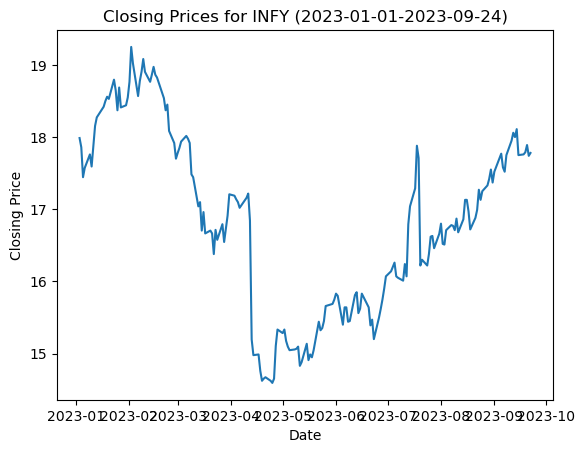

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Get the stock data
ticker = "INFY"
start_date = "2023-01-01"
end_date = "2023-09-24"
df = yf.download(ticker, start_date, end_date)

# Plot the closing prices
plt.plot(df["Adj Close"])

# Set the title and labels
plt.title("Closing Prices for {} ({}-{})".format(ticker, start_date, end_date))
plt.xlabel("Date")
plt.ylabel("Closing Price")

# Show the plot
plt.show()
